In [6]:

%matplotlib inline
from math import pi
from scipy.integrate import odeint  # integrates a system of ODEs
import numpy as np
import matplotlib.pyplot as plt
plt.install_repl_displayhook()

# change some of the defaults for plots
plt.rcParams['text.usetex'] = False
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
from IPython.display import display, Markdown, Latex, Math, Pretty

############################ constants
m = 1                      # mass
ell = 1                    # length
g = 10                     # free-fall acceleration
Omega = np.sqrt( g / ell ) # natural frequency
N = 100                    # number of time steps per period
n = 10                     # number of periods
############################ calculated constants
T = 2*pi/Omega             # period
dT = T / N                 # time step
t = np.arange(0,n*T,dT)    # times, $t_i, i=0...nN-1$

[0, 2, -4, 4]

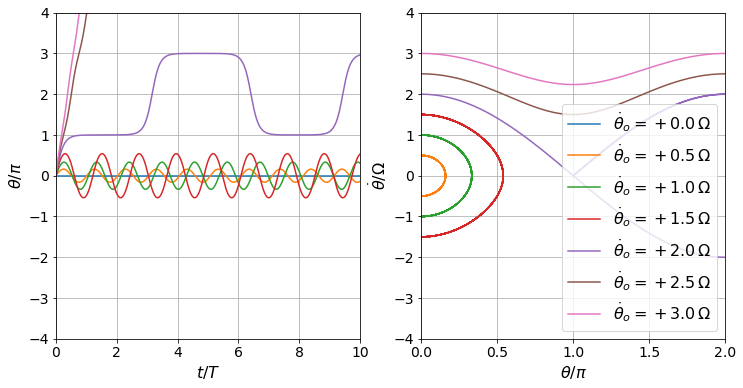

In [7]:
################################# time derivative of the state vector
def psidot1( psi, t ) :          # returns $\dot{\vec{\psi}}$
    theta, thetaDot = psi       # unpack $\vec{\psi}=[x,v]$
    thetaDotDot = - Omega**2 * np.sin(theta)
    psiDot = np.array( [thetaDot, thetaDotDot] )
    return psiDot

fig = plt.figure()
ax1 = fig.add_subplot( 1, 2, 1 )  # for $\theta(t)$
ax2 = fig.add_subplot( 1, 2, 2 )  # for $\dot{\theta}(\theta)$

for i in np.linspace( 0, 3, 7 ) :
    # initial conditions
    psi0 = np.array( [0, i*Omega ] )
    # calculate
    theta, thetaDot = odeint( psidot1, psi0, t ).T
    # plot
    label = r'$\dot{\theta}_o=%+.1f\,\Omega$'%(i)
    ax1.plot( t/T, theta/pi,  label=label )
    ax2.plot( theta/pi, thetaDot/Omega,  label=label )

# make it pretty
ax1.set_xlabel( r'$t/T$' )
ax1.set_ylabel( r'$\theta/\pi$' )
ax1.grid( 'on' )
ax1.set_xlim( 0, n )
ax1.set_ylim( -4, 4 )


ax2.set_xlabel( r'$\theta/\pi$' )
ax2.set_ylabel( r'$\dot{\theta}/\Omega$' )
ax2.grid( 'on' )
ax2.legend( loc=4 )
ax2.axis( [ 0, 2, -4, 4 ] )


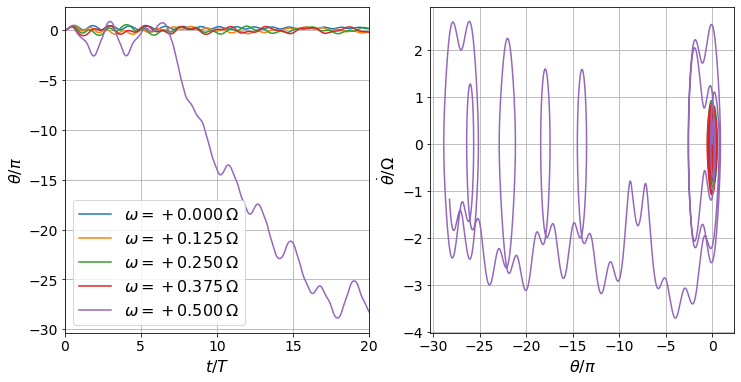

In [8]:
n = 20                     # number of periods
############################ calculated constants
beta = 0.01 * Omega
f = 2 * Omega
t = np.linspace( 0, n*T, n*N)
# start at equilibrium postion and at rest
psi0 = np.array( [0, 0] )

################################# time derivative of the state vector
def psidot2( psi, t ) :         # returns $\dot{\vec{\psi}}$
    theta, thetaDot = psi       # unpack $\vec{\psi}=[x,v]$
    thetaDotDot = \
        - Omega**2 * np.sin(theta) \
        - 2 * beta * thetaDot \
        + f * np.cos( w * t )
    psiDot = np.array( [thetaDot, thetaDotDot] )
    return psiDot

fig = plt.figure()
ax1 = fig.add_subplot( 1, 2, 1 )
ax2 = fig.add_subplot( 1, 2, 2 )

for i in np.linspace( 0.0, 0.50, 5 ) :
    # initial conditions
    w = i*Omega
    # calculate
    theta, thetaDot = odeint( psidot2, psi0, t ).T
    # plot
    label = r'$\omega=%+.3f\,\Omega$'%(i)
    ax1.plot( t/T, theta/pi,  label=label )
    ax2.plot( theta/pi, thetaDot/Omega)

# make it pretty
ax1.set_xlabel( r'$t/T$' )
ax1.set_ylabel( r'$\theta/\pi$' )
ax1.grid( 'on' )
ax1.legend( loc=3 )
ax1.set_xlim( 0, n )

ax2.set_xlabel( r'$\theta/\pi$' )
ax2.set_ylabel( r'$\dot{\theta}/\Omega$' )
ax2.grid( 'on' )


Text(0, 0.5, '$\\Delta\\theta/\\pi$')

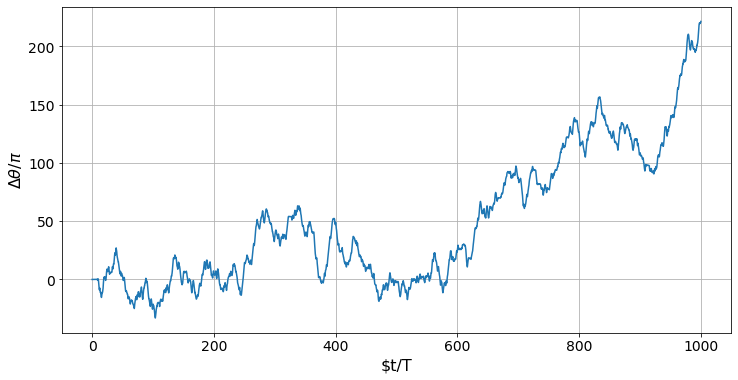

In [9]:
n = 1000                  # number of periods
t = np.linspace( 0, n*T, n*N)

#We demonstrate chaos in this pendula system by changing slightly the driving frequency w,
#and by plotting the difference between w and w' we see the angle of the two pendula diverge sharply with time
w = 0.6 * Omega
theta1, thetaDot1 = odeint( psidot2, psi0, t ).T

w = 0.60001 * Omega
theta2, thetaDot2 = odeint( psidot2, psi0, t ).T

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot( t/T, (theta2 - theta1)/pi )
ax.set_xlabel( '$t/T' )
ax.set_ylabel( r'$\Delta\theta/\pi$')